In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot
%matplotlib inline

In [3]:


dataset = pd.read_csv('https://raw.githubusercontent.com/Sid-darthvader/DoWhy-The-Causal-Story-Behind-Hotel-Booking-Cancellations/master/hotel_bookings.csv')


In [4]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
dataset.isnull().mean()

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

# Data Cleaning

# 1)Dropping column
Here in the dataset since almost 95% values of company is missing so we drop that column

In [6]:
dataset=dataset.drop('company',axis=1)

# 2)Random imputation

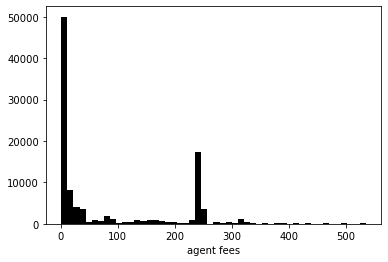

In [7]:
sns.distplot(dataset['agent'],kde=False,bins=50,hist_kws={ "linewidth": 3,"alpha": 1, "color": "black"},axlabel='agent fees')

In [8]:
dataset['agent']=dataset['agent'].replace(np.nan,0)

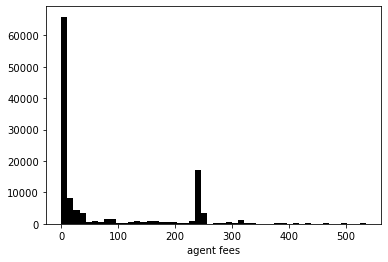

In [9]:
sns.distplot(dataset['agent'],kde=False,bins=50,hist_kws={ "linewidth": 3,"alpha": 1, "color": "black"},axlabel='agent fees')


## 3)Dropping null values
Here in the dataset the children and country column have very less missing values so we will drop thos missing values

In [10]:
dataset.dropna(inplace=True)

In [11]:
dataset.to_csv("data1.csv",index=False)

In [12]:
dataset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [13]:
dataset['total_guests']=dataset['adults']+dataset['babies']+dataset['children']

In [14]:
dataset.drop(['adults','babies','children'],axis=1,inplace=True)

In [15]:
dataset['total_days']=dataset['stays_in_week_nights']+dataset['stays_in_weekend_nights']
dataset.drop(['stays_in_week_nights','stays_in_weekend_nights'],axis=1,inplace=True)

In [16]:
dataset['is_canceled']=np.where(dataset['is_canceled']==0,'Booking not canceled','Booking canceled')
dataset['is_repeated_guest']=np.where(dataset['is_repeated_guest']==0,"First time guest","Repeated Guest")
dataset['previous_cancellations']=np.where(dataset['previous_cancellations']==0,"No previous cancellation","Previously Cancelled")

In [17]:
dataset["different_room_assigned"]=np.where(dataset["reserved_room_type"]==dataset["assigned_room_type"],0,1)
dataset.drop(['assigned_room_type',"reserved_room_type"],axis=1,inplace=True)

# EDA

<IPython.core.display.Javascript object>

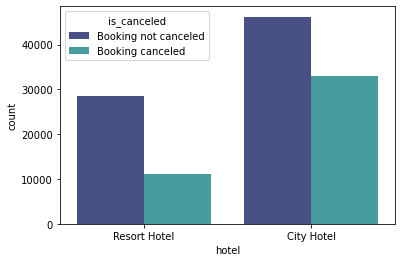

In [18]:
sns.countplot(dataset['hotel'],hue=dataset['is_canceled'],palette='mako')
plt.savefig('Type_of_hotel-is_canceled_1.png')

##### we can see that City hotels have high chance of cancelling than resorts


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  object 
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   meal                            118898 non-null  object 
 8   country                         118898 non-null  object 
 9   market_segment                  118898 non-null  object 
 10  distribution_channel            118898 non-null  object 
 11  is_repeated_guest               118898 non-null  object 
 12  previous_cancell

<IPython.core.display.Javascript object>

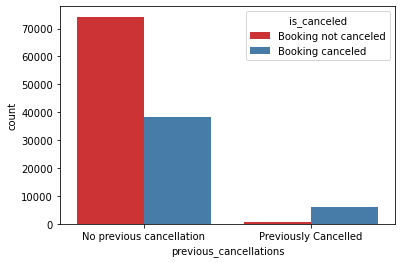

In [20]:
sns.countplot(dataset['previous_cancellations'],hue=dataset['is_canceled'],palette="Set1")
plt.savefig("prev_cancellation_is_cancelled_2.png")

##### We can see that when a person has previously cancelled then there is a high chance that they will cancel again

In [22]:
dataset.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_days,different_room_assigned
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,104.311435,2016.157656,27.166555,15.800880,0.131634,0.221181,74.896264,2.330754,102.003243,0.061885,0.571683,1.970546,3.431042,0.123627
std,106.903309,0.707459,13.589971,8.780324,1.484672,0.652785,107.145761,17.630452,50.485862,0.244172,0.792678,0.721894,2.544938,0.329157
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,0.000000,7.000000,0.000000,70.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,0.000000,0.000000,9.000000,0.000000,95.000000,0.000000,0.000000,2.000000,3.000000,0.000000
75%,161.000000,2017.000000,38.000000,23.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000,2.000000,4.000000,0.000000
max,737.000000,2017.000000,53.000000,31.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,55.000000,57.000000,1.000000


<IPython.core.display.Javascript object>

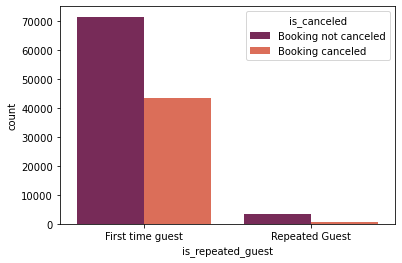

In [23]:
sns.countplot(dataset['is_repeated_guest'],hue=dataset['is_canceled'],palette='rocket')
plt.savefig("repeated_guest_is_cancelled_3.png")

##### It is obvious that when a person is a repeated guest he likes the hotel/resort and hence there is less chance of him or her cancelling the booking

<IPython.core.display.Javascript object>

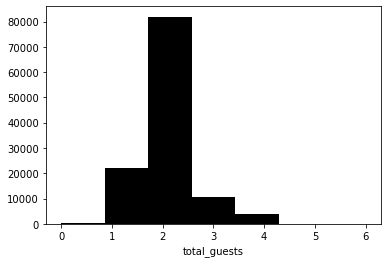

In [24]:

sns.distplot(dataset[dataset['total_guests']<10]['total_guests'],kde=False,bins=7,
             hist_kws={"linewidth": 3,"alpha": 1, "color": "black"})
plt.savefig("histogram_total_guests_4.png")

##### The most number of guests that stay are two

<IPython.core.display.Javascript object>

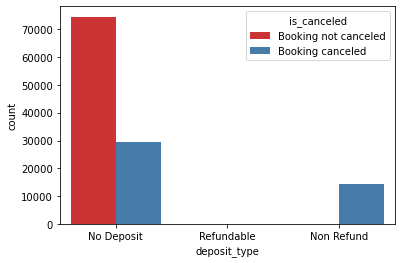

In [25]:
sns.countplot(dataset['deposit_type'],hue=dataset['is_canceled'],palette='Set1')
plt.savefig("deposit_type_is_canceled_5.png")

##### This visualisation that wesee is pretty interesting since when the deposit type is non refundable then most of the time the booking is cancelled. As a generral thought a person may think if a booking is non refundable then there is less chance for it to be cancelled

['hotel', 'is_canceled', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

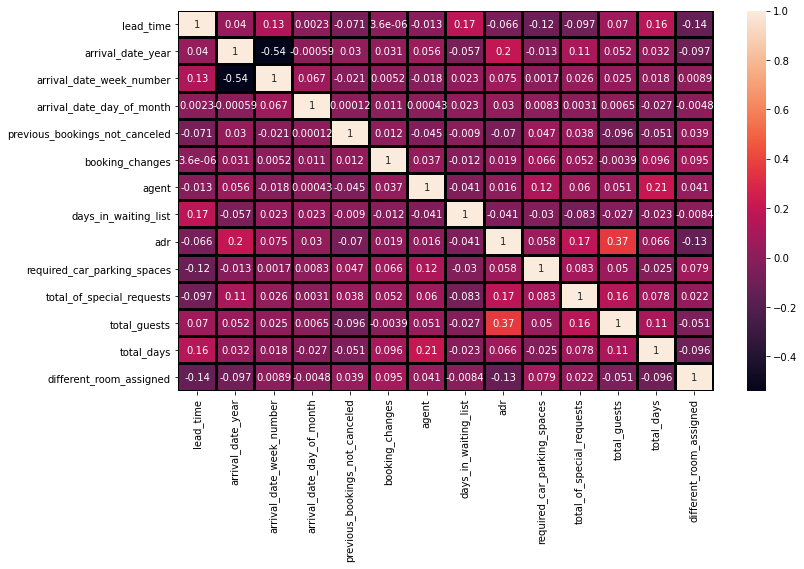

In [26]:
categorical_features = []
numerical_features = []

for col in dataset.columns:
    if(dataset[col].dtype!='object'):
        numerical_features.append(col)
    else:
        categorical_features.append(col)
print(categorical_features)
import seaborn as sns
plt.figure(figsize=(12,7))
sns.heatmap(dataset[numerical_features].corr(),linewidths=2,linecolor='black',annot=True)
plt.savefig("heatmap_6.png")

##### Shows correlation heat map of all the numerical features

In [27]:
not_canceled=dataset[dataset["is_canceled"]=='Booking not canceled']
nc_month=not_canceled.groupby('arrival_date_month').count()

canceled=dataset[dataset["is_canceled"]=='Booking canceled']
c_month=canceled.groupby('arrival_date_month').count()

In [28]:
c_month

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_days,different_room_assigned
arrival_date_month,,,,,,,,,,,,,,,,,,,,,
April,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512,...,4512,4512,4512,4512,4512,4512,4512,4512,4512,4512
August,5234,5234,5234,5234,5234,5234,5234,5234,5234,5234,...,5234,5234,5234,5234,5234,5234,5234,5234,5234,5234
December,2363,2363,2363,2363,2363,2363,2363,2363,2363,2363,...,2363,2363,2363,2363,2363,2363,2363,2363,2363,2363
February,2695,2695,2695,2695,2695,2695,2695,2695,2695,2695,...,2695,2695,2695,2695,2695,2695,2695,2695,2695,2695
January,1806,1806,1806,1806,1806,1806,1806,1806,1806,1806,...,1806,1806,1806,1806,1806,1806,1806,1806,1806,1806
July,4736,4736,4736,4736,4736,4736,4736,4736,4736,4736,...,4736,4736,4736,4736,4736,4736,4736,4736,4736,4736
June,4534,4534,4534,4534,4534,4534,4534,4534,4534,4534,...,4534,4534,4534,4534,4534,4534,4534,4534,4534,4534
March,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,...,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148
May,4677,4677,4677,4677,4677,4677,4677,4677,4677,4677,...,4677,4677,4677,4677,4677,4677,4677,4677,4677,4677


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

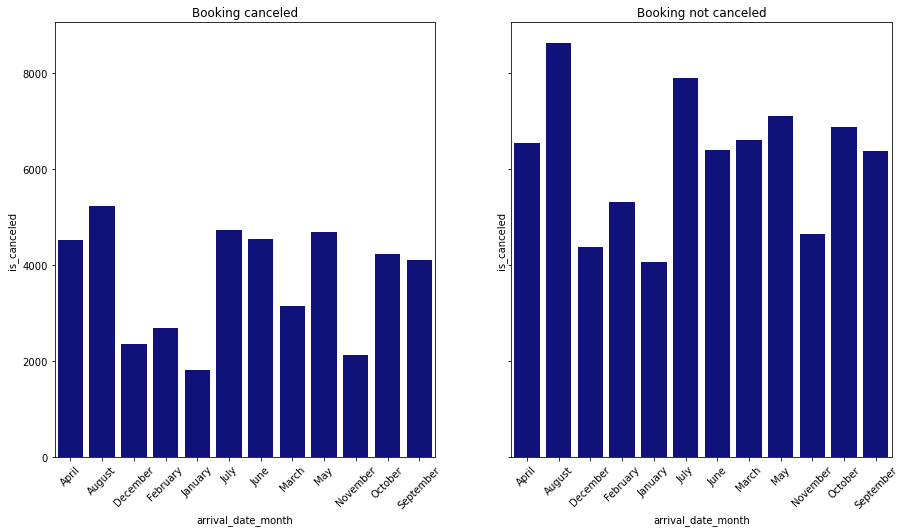

In [29]:

f, axes = plt.subplots(1, 2,figsize=(15,8),sharex=True,sharey=True,)
sns.barplot(c_month.index,c_month['is_canceled'],ax=axes[0],color='darkblue')
sns.barplot(nc_month.index,nc_month['is_canceled'],ax=axes[1],color='darkblue')
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)
axes[0].set_title("Booking canceled")
axes[1].set_title("Booking not canceled")
plt.savefig("is_cancelled_Acctomonth_7.png")

##### The month of August has the most hotel cancellations andtye month of January has the least

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

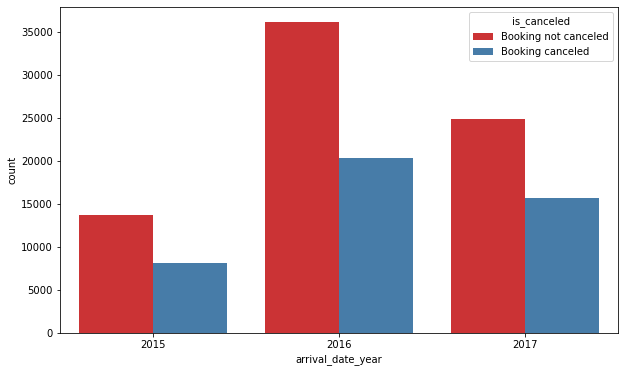

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(data=dataset,x='arrival_date_year',hue='is_canceled',palette='Set1')
plt.savefig("is_cancelled_year_8.png")

# Model

In [32]:
dataset['is_canceled']=np.where(dataset['is_canceled']=='Booking not canceled',0,1)
dataset['is_repeated_guest']=np.where(dataset['is_repeated_guest']=="First time guest",0,1)
dataset['previous_cancellations']=np.where(dataset['previous_cancellations']=="No previous cancellation",0,1)

In [33]:
dataset['different_room_assigned']= dataset['different_room_assigned'].replace(1,True)
dataset['different_room_assigned']= dataset['different_room_assigned'].replace(0,False)
dataset['is_canceled']= dataset['is_canceled'].replace(1,True)
dataset['is_canceled']= dataset['is_canceled'].replace(0,False)

In [34]:
import dowhy

In [35]:
from graphviz import Source

In [34]:
from IPython.display import Image, display

In [36]:
from dowhy import CausalModel

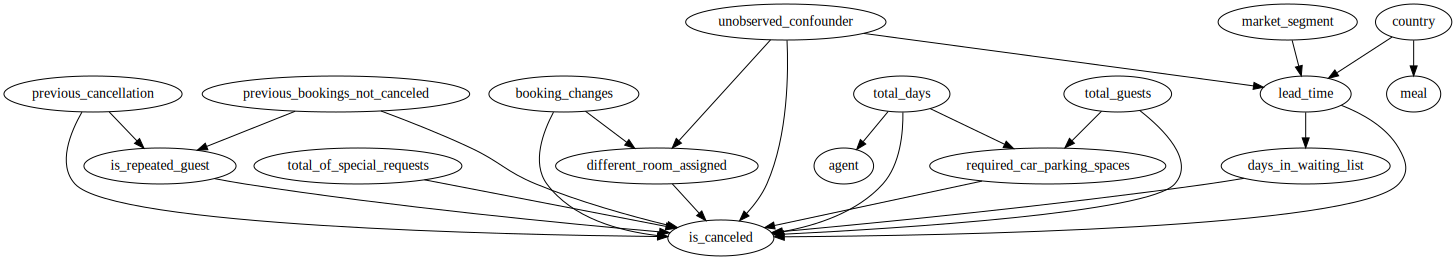

In [37]:
from causalgraphicalmodels import CausalGraphicalModel
graph = CausalGraphicalModel(
    nodes=[ 'is_canceled', 'lead_time', "unobserved_confounder",'total_of_special_requests',
        'meal', 'country', 'market_segment',
        'is_repeated_guest', 
       'previous_bookings_not_canceled', 'booking_changes', 'previous_cancellation','required_car_parking_spaces',
        'days_in_waiting_list',
         'total_guests',
       'total_days', 'different_room_assigned','agent'],
    edges=[
        ("market_segment", "lead_time"), 
        ("lead_time", "is_canceled"), 
        ("country", "lead_time"),
        ("different_room_assigned", "is_canceled"), 
        ("unobserved_confounder", "is_canceled"),("unobserved_confounder","lead_time"),("unobserved_confounder","different_room_assigned"),
        ("country","meal"),
        ("lead_time",'days_in_waiting_list'),
        ('days_in_waiting_list',"is_canceled"),
        ('previous_bookings_not_canceled','is_canceled'),
        ('previous_bookings_not_canceled','is_repeated_guest'),
        ('is_repeated_guest','is_canceled'),
        ('total_days',"is_canceled"),
        ('total_days',"agent"),
        ('total_guests','is_canceled'),
        ('previous_cancellation','is_canceled'),
        ('previous_cancellation','is_repeated_guest'),
        ('required_car_parking_spaces','is_canceled'),('total_guests','required_car_parking_spaces'),('total_days','required_car_parking_spaces'),
        ('total_of_special_requests','is_canceled'),
        ('booking_changes','different_room_assigned'),('booking_changes','is_canceled')
    ]
)
G=graph.draw()
G

In [66]:
G.render('test-output/causal',format='png') 

'test-output\\causal.png'

In [38]:
causal_graph = """digraph {
different_room_assigned[label="Different Room Assigned"];
is_canceled[label="Booking Cancelled"];
booking_changes[label="Booking Changes"];
previous_bookings_not_canceled[label="Previous Booking Retentions"];
days_in_waiting_list[label="Days in Waitlist"];
lead_time[label="Lead Time"];
market_segment[label="Market Segment"];
country[label="Country"];
U[label="Unobserved Confounders"];
is_repeated_guest;
agent;
total_days;
total_guests;
meal;
hotel;
U->different_room_assigned; U->is_canceled;U->required_car_parking_spaces;
market_segment -> lead_time;
lead_time->is_canceled; country -> lead_time;
different_room_assigned -> is_canceled;
country->meal;
lead_time -> days_in_waiting_list;
days_in_waiting_list ->is_canceled;
previous_bookings_not_canceled -> is_canceled;
previous_bookings_not_canceled -> is_repeated_guest;
is_repeated_guest -> is_canceled;
total_days -> is_canceled;
total_days->agent;
total_guests -> is_canceled;
booking_changes -> different_room_assigned; booking_changes -> is_canceled; 
hotel -> is_canceled;
required_car_parking_spaces -> is_canceled;
total_of_special_requests -> is_canceled;
country->{hotel, required_car_parking_spaces,total_of_special_requests,is_canceled};
market_segment->{hotel, required_car_parking_spaces,total_of_special_requests,is_canceled};
}"""

In [39]:
import statsmodels
model= dowhy.CausalModel(
        data = dataset,
        graph=causal_graph.replace("\n", " "),
        treatment="different_room_assigned",
        outcome='is_canceled')
#Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                 
──────────────────────────(Expectation(is_canceled|agent,total_days,meal,hotel
d[different_room_assigned]                                                    

                                                                              
,days_in_waiting_list,lead_time,total_of_special_requests,booking_changes,tota
                                                                              

                                                                              
l_guests,country,required_car_parking_spaces,is_repeated_guest,market_segment,
                                                                              

                                
previous_bookings_not_canceled))
                                
Estimand assumption 1, Unconfoundedness: If U→{different_room_assigned} and U→is_canceled t

In [40]:
dataset['different_room_assigned'].value_counts()

False    104199
True      14699
Name: different_room_assigned, dtype: int64

In [45]:

estimate = model.estimate_effect(identified_estimand, 
                                     method_name="backdoor.propensity_score_stratification",target_units="ate")
# ATE = Average Treatment Effect
# ATT = Average Treatment Effect on Treated (i.e. those who were assigned a different room)
# ATC = Average Treatment Effect on Control (i.e. those who were not assigned a different room)
print(estimate)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.war

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                 
──────────────────────────(Expectation(is_canceled|agent,total_days,meal,hotel
d[different_room_assigned]                                                    

                                                                              
,days_in_waiting_list,lead_time,total_of_special_requests,booking_changes,tota
                                                                              

                                                                              
l_guests,country,required_car_parking_spaces,is_repeated_guest,market_segment,
                                                                              

                                
previous_bookings_not_canceled))
                                
Estimand assumption 1, Unconfoundedness: If

C:\Users\dell\anaconda3\lib\site-packages\dowhy\causal_estimators\propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
